# RPA

## 오라클 계정 생성 및 연결

In [11]:
#오라클 계정 생성
import cx_Oracle
import pandas as pd

dsn=cx_Oracle.makedsn('localhost',1521,'xe') 
print(dsn, type(dsn))

(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SID=xe))) <class 'str'>


In [12]:
#오라클 연결
db=cx_Oracle.connect('hr','oracle')
print(db, type(db))

<cx_Oracle.Connection to user hr@local> <class 'cx_Oracle.Connection'>


In [13]:
cursor=db.cursor()
print(cursor, type(cursor))

<cx_Oracle.Cursor on <cx_Oracle.Connection to user hr@local>> <class 'cx_Oracle.Cursor'>


In [15]:
#emp테이블 컬럼 모두 불러오기
cursor.execute("""select * from emp""")                     
row=cursor.fetchall() 

print(row, type(row))

[(7369, datetime.datetime(2021, 4, 1, 16, 24, 18), 'SMITH', 800.0, 'CLERK'), (7499, datetime.datetime(2021, 4, 1, 16, 24, 18), 'ALLEN', 1600.0, 'SALESMAN'), (7521, datetime.datetime(2021, 4, 1, 16, 24, 18), 'WARD', 1250.0, 'SALESMAN'), (7566, datetime.datetime(2021, 4, 1, 16, 24, 18), 'JONES', 2975.0, 'MANAGER'), (7654, datetime.datetime(2021, 4, 1, 16, 24, 18), 'MARTIN', 1250.0, 'SALESMAN'), (7698, datetime.datetime(2021, 4, 1, 16, 24, 18), 'BLAKE', 2850.0, 'MANAGER'), (7782, datetime.datetime(2021, 4, 1, 16, 24, 18), 'CLARK', 2450.0, 'MANAGER'), (7839, datetime.datetime(2021, 4, 1, 16, 24, 18), 'KING', 5000.0, 'PRESIDENT'), (7844, datetime.datetime(2021, 4, 1, 16, 24, 18), 'TURNER', 1500.0, 'SALESMAN'), (7900, datetime.datetime(2021, 4, 1, 16, 24, 18), 'JAMES', 950.0, 'CLERK'), (7902, datetime.datetime(2021, 4, 1, 16, 24, 18), 'FORD', 3000.0, 'ANALYST'), (7934, datetime.datetime(2021, 4, 1, 16, 24, 18), 'MILLER', 1300.0, 'CLERK'), (7788, datetime.datetime(2021, 4, 1, 16, 24, 18), 'SC

In [16]:
colname=cursor.description
print(colname, type(colname))

[('EMPNO', <cx_Oracle.DbType DB_TYPE_NUMBER>, 5, None, 4, 0, 1), ('DEPTNO', <cx_Oracle.DbType DB_TYPE_DATE>, 23, None, None, None, 1), ('ENAME', <cx_Oracle.DbType DB_TYPE_VARCHAR>, 10, 10, None, None, 1), ('SAL', <cx_Oracle.DbType DB_TYPE_NUMBER>, 11, None, 7, 2, 1), ('JOB', <cx_Oracle.DbType DB_TYPE_VARCHAR>, 9, 9, None, None, 1)] <class 'list'>


In [18]:
col=[] 
for i in colname: 
    col.append(i[0]) 
    
# pandas를 사용한 데이터 프레임 형식으로 변환
emp=pd.DataFrame(row,columns=col) 
print(emp.info())
print(emp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   EMPNO   14 non-null     int64         
 1   DEPTNO  14 non-null     datetime64[ns]
 2   ENAME   14 non-null     object        
 3   SAL     14 non-null     float64       
 4   JOB     14 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 688.0+ bytes
None
    EMPNO              DEPTNO   ENAME     SAL        JOB
0    7369 2021-04-01 16:24:18   SMITH   800.0      CLERK
1    7499 2021-04-01 16:24:18   ALLEN  1600.0   SALESMAN
2    7521 2021-04-01 16:24:18    WARD  1250.0   SALESMAN
3    7566 2021-04-01 16:24:18   JONES  2975.0    MANAGER
4    7654 2021-04-01 16:24:18  MARTIN  1250.0   SALESMAN
5    7698 2021-04-01 16:24:18   BLAKE  2850.0    MANAGER
6    7782 2021-04-01 16:24:18   CLARK  2450.0    MANAGER
7    7839 2021-04-01 16:24:18    KING  5000

In [27]:
import cx_Oracle
import pandas as pd

db = None
cursor = None
row = None
col=[] 

try :
    dsn=cx_Oracle.makedsn('localhost',1521,'xe') 
    #print(dsn, type(dsn))
    
    db=cx_Oracle.connect('hr','oracle')
    #print(db, type(db))

    cursor=db.cursor()
    #print(cursor, type(cursor))
    cursor.execute("""select * from emp""")
                     
    row=cursor.fetchall() 
    #print(row, type(row))

    colname=cursor.description
    #print(colname, type(colname))

    for i in colname: 
        col.append(i[0]) 

except : 
    print ('db 연동 error')

finally :
    cursor.close()
    db.close()
    
# pandas를 사용한 데이터 프레임 형식으로 변환
emp=pd.DataFrame(row,columns=col) 
#print(emp.info())
print(emp)

    EMPNO              DEPTNO   ENAME     SAL        JOB
0    7369 2021-04-01 16:24:18   SMITH   800.0      CLERK
1    7499 2021-04-01 16:24:18   ALLEN  1600.0   SALESMAN
2    7521 2021-04-01 16:24:18    WARD  1250.0   SALESMAN
3    7566 2021-04-01 16:24:18   JONES  2975.0    MANAGER
4    7654 2021-04-01 16:24:18  MARTIN  1250.0   SALESMAN
5    7698 2021-04-01 16:24:18   BLAKE  2850.0    MANAGER
6    7782 2021-04-01 16:24:18   CLARK  2450.0    MANAGER
7    7839 2021-04-01 16:24:18    KING  5000.0  PRESIDENT
8    7844 2021-04-01 16:24:18  TURNER  1500.0   SALESMAN
9    7900 2021-04-01 16:24:18   JAMES   950.0      CLERK
10   7902 2021-04-01 16:24:18    FORD  3000.0    ANALYST
11   7934 2021-04-01 16:24:18  MILLER  1300.0      CLERK
12   7788 2021-04-01 16:24:18   SCOTT  3000.0    ANALYST
13   7876 2021-04-01 16:24:18   ADAMS  1100.0      CLERK


## 오류 내보기

In [31]:
import cx_Oracle
import pandas as pd

db = None
cursor = None
row=None
col = []
try:
    dsn=cx_Oracle.makedsn('localhost',1521,'xe')
    db= cx_Oracle.connect('hr', 'oracle')
    
    cursor = db.cursor()
    cursor.execute("""select * from empㅇ""")

    row = cursor.fetchall()
    colname = cursor.description
    
    for i in colname:
        col.append(i[0]) 
except e:
    print('db 연동 error')
    #print(e)         #예외 정보 보여줌
finally:
    cursor.close()
    db.close()
    
# pandas를 사용한 데이터 프레임 형식으로 변환
emp=pd.DataFrame(row,columns=col) 
#print(emp.info())
print(emp)    

NameError: name 'e' is not defined

In [32]:
import cx_Oracle
import pandas as pd

db = None
cursor = None
row=None
col = []
try:
    dsn=cx_Oracle.makedsn('localhost',1521,'xe')
    db= cx_Oracle.connect('hr!', 'oracle')
    
    cursor = db.cursor()
    cursor.execute("""select * from emp""")

    row = cursor.fetchall()
    colname = cursor.description
    
    for i in colname:
        col.append(i[0]) 
except e:
    print('db 연동 error')
    #print(e)         #예외 정보 보여줌
finally:
    cursor.close()
    db.close()
    
# pandas를 사용한 데이터 프레임 형식으로 변환
emp=pd.DataFrame(row,columns=col) 
#print(emp.info())
print(emp)    

AttributeError: 'NoneType' object has no attribute 'close'

## 급여 2000이상, 부서번호 20번인 사원 조회

In [47]:
import cx_Oracle 
import pandas as pd

db = None
cursor = None

try :
    dsn=cx_Oracle.makedsn('localhost',1521,'xe') 
    db=cx_Oracle.connect('hr','oracle') 

    cursor=db.cursor()
    statement = """select * from employees where department_id = :1 and salary >= :2"""
    cursor.execute(statement, (20,2000))

    rows=cursor.fetchall() 
    
    
    for row in rows:
        print(row)
        
except Exception as e:
    print ('db 연동 error', e)
finally :
    if cursor!= None :
        cursor.close()
    if db!= None:
        db.close()

(201, 'Michael', 'Hartstein', 'MHARTSTE', '515.123.5555', datetime.datetime(2004, 2, 17, 0, 0), 'MK_MAN', 13000.0, None, 100, 20)
(202, 'Pat', 'Fay', 'PFAY', '603.123.6666', datetime.datetime(2005, 8, 17, 0, 0), 'MK_REP', 6000.0, None, 201, 20)


## Insert문

In [52]:
import cx_Oracle 

db = None     #Connection 객체 저장될 변수
cursor = None #SQL 실행 정보 저장 메모리 정보 저장 객체

try :
    dsn=cx_Oracle.makedsn('localhost',1521,'xe') 
    db=cx_Oracle.connect('hr','oracle') 
    cursor=db.cursor()
    
    dataToInsert = [ (50, 'IT', 'Seoul'), (60, 'AI', 'Pusan')]
    cursor.executemany('insert into dept values (:1, :2, :3)', dataToInsert, batcherrors=True)
    for error in cursor.getbatcherrors():   #에러가 없으면 수행되지 않음
        print(error.message, error.offset)
    
    db.commit()
    
    
    statement = """select * from dept"""
    cursor.execute(statement)

    rows=cursor.fetchall() 
    
    
    for row in rows:
        print(row)
        
except Exception as e:
    print ('db 연동 error', e)
finally :
    if cursor!= None :
        cursor.close()
    if db!= None:
        db.close()

(10, 'ACCOUNTING', 'NEW YORK')
(20, 'RESEARCH', 'DALLAS')
(30, 'SALES', 'CHICAGO')
(40, 'OPERATIONS', 'BOSTON')
(50, 'IT', 'Seoul')
(60, 'AI', 'Pusan')


## 부서 테이블에서 50, 60번 부서정보 삭제

In [63]:
import cx_Oracle 

db = None     #Connection 객체 저장될 변수
cursor = None #SQL 실행 정보 저장 메모리 정보 저장 객체

try :
    dsn=cx_Oracle.makedsn('localhost',1521,'xe') 
    db=cx_Oracle.connect('hr','oracle') 
    cursor=db.cursor()
    
    cursor.execute('delete from dept where deptno =:dno',{'dno':50})
    db.commit()  
    
    statement = """select * from dept"""
    cursor.execute(statement)

    rows=cursor.fetchall() 
    
    for row in rows:
        print(row)
        
except Exception as e:
    print ('db 연동 error', e)
finally :
    if cursor!= None :
        cursor.close()
    if db!= None:
        db.close()

(10, 'ACCOUNTING', 'NEW YORK')
(20, 'RESEARCH', 'DALLAS')
(30, 'SALES', 'CHICAGO')
(40, 'OPERATIONS', 'BOSTON')
(60, 'AI', 'Pusan')


## Pyautogui

### 마우스 자동화

In [1]:
import pyautogui
pyautogui.size() #모니터의 가로 세로 크기를 반환

Size(width=1920, height=1080)

In [2]:
pyautogui.moveTo(500, 500, duration = 1) #(500,500) 위치로 1초 동안에 이동

In [3]:
pyautogui.moveTo(100, 100)

In [4]:
pyautogui.FAILSAFE = False
pyautogui.moveTo(-100, -100)

In [6]:
pyautogui.moveTo(400,500,duration=1)
pyautogui.click()

In [7]:
pyautogui.click(400,500)

In [9]:
pyautogui.moveTo(400,500,duration=1)
pyautogui.dragTo(600,900,duration=1)

In [10]:
pyautogui.PAUSE = 0.1 #명령 사이 간격을 0.1초로 설정한다

In [11]:
import time  #명령과 명령 사이의 시간 간격을 줄 때 사용
time.sleep(2)

In [12]:
buttons = {'1':(52,555), '2':(151,561), '3':(250,559)}

In [14]:
x, y = buttons['1']  #버튼 1에 대한 좌표를 얻는다
pyautogui.click(x, y)#해당 좌표 클릭

x, y = buttons['2']
pyautogui.click(x, y)

x, y = buttons['3']
pyautogui.click(x, y)

In [37]:
for c in '123':
    x, y = buttons[c]
    pyautogui.click(x,y,duration=1)

In [39]:
buttons = {'1':(52,555), '2':(151,561), '3':(250,559), '4':(56,493), '5':(149,489), '6':(249,490),
          '7':(54,424), '8':(155,424), '9':(251,423), '+':(346,557), '-':(346,490) ,'*':(347,419),
          '/':(345,354), '=':(343,625), 'C':(150,288)}

In [46]:
for i in 'C3+4*2=':
    x,y = buttons[i]
    time.sleep(1)
    pyautogui.click(x,y,duration=1)

In [109]:
import pyautogui as p
import time
p.moveRel(500, 500, duration=1)
time.sleep(2) 
p.dragTo(931, 347, 1, button='left')
p.click(x=487, y=142, button='right')
p.rightClick(x=487, y=142)

FailSafeException: PyAutoGUI fail-safe triggered from mouse moving to a corner of the screen. To disable this fail-safe, set pyautogui.FAILSAFE to False. DISABLING FAIL-SAFE IS NOT RECOMMENDED.

In [54]:
p.scroll(-1000) #아래로 1000번 스크롤
p.scroll(1000) #위로 1000번 스크롤

In [57]:
import pyautogui
position = pyautogui.position() # 좌표 객체 얻기
print(pyautogui.size()) # 화면 전체 크기 확인하기
print(position.x) # x, y 좌표
print(position.y)
pyautogui.moveTo(500, 500) # 마우스 이동 (x 좌표, y 좌표)
pyautogui.moveTo(100, 100, 2) # 마우스 이동 (x 좌표, y 좌표 2초간)
pyautogui.moveRel(200, 300, 2) # 마우스 이동 ( 현재위치에서 )
pyautogui.click() # 마우스 클릭
pyautogui.click(clicks= 2, interval=2) # 2초 간격으로 2번 클릭
pyautogui.doubleClick() # 더블 클릭
pyautogui.click(button='right') # 오른쪽 클릭
pyautogui.scroll(10) # 스크롤하기
pyautogui.drag(0, 300, 1, button='left') # 드래그하기

Size(width=1920, height=1080)
635
658


### 캡쳐 자동화

In [113]:
pyautogui.locateOnScreen('img/cal_1.png') 

Box(left=7, top=525, width=98, height=67)

In [114]:
pyautogui.locateCenterOnScreen('img/cal_1.png')

Point(x=56, y=558)

In [116]:
pyautogui.center((7, 525, 98, 67))

Point(x=56, y=558)

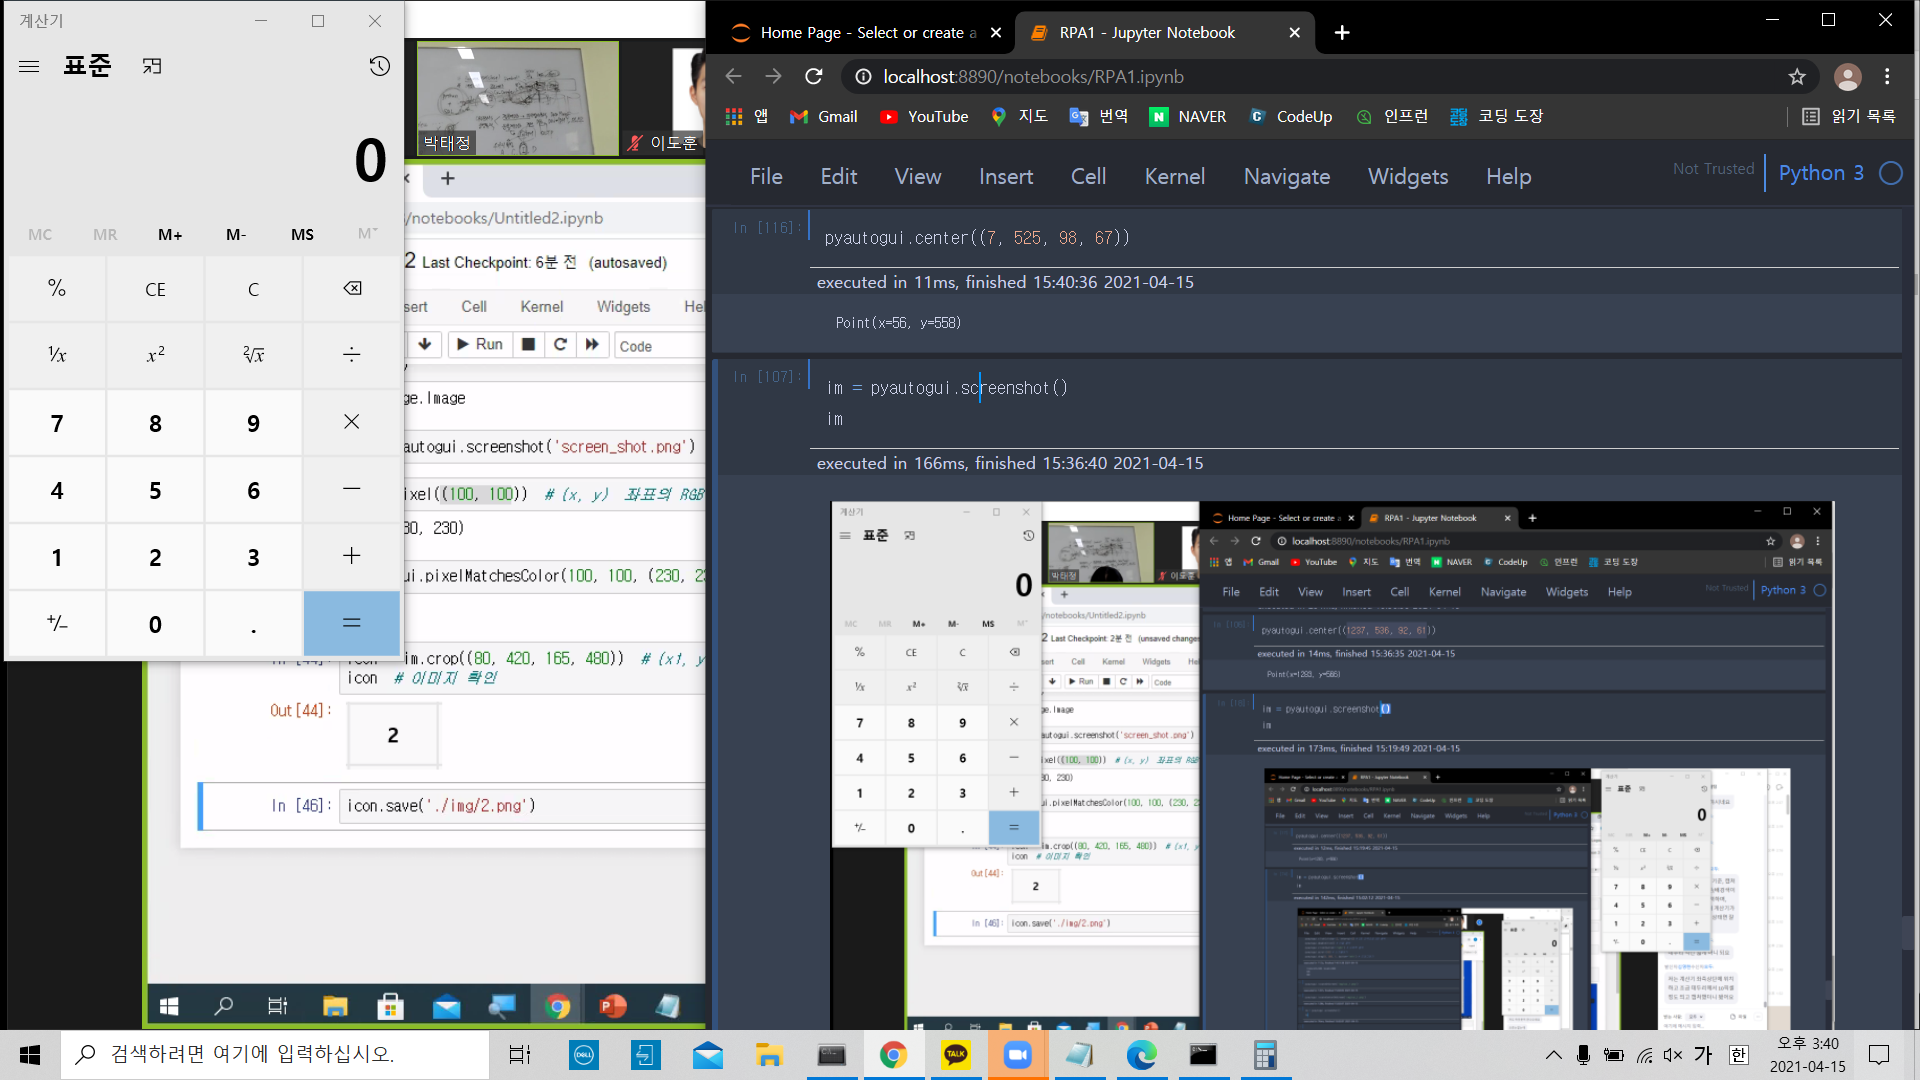

In [117]:
im = pyautogui.screenshot()
im

In [23]:
type(im)

PIL.Image.Image

In [119]:
im = pyautogui.screenshot('screen_shot.png')

In [120]:
im.getpixel( (100, 100) )  #(x, y) 좌표의 RGB 색상 정로를 반환

(230, 230, 230)

In [123]:
pyautogui.pixelMatchesColor( 100, 100, (230, 230, 230))

False

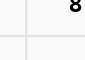

In [144]:
icon = im.crop((80, 420, 165, 480)) # (좌,상,우,하)
icon # 이미지 확인

## 계산기 자동화

In [148]:
from subprocess import Popen
import time
Popen('calc') #계산기를 실행
time.sleep(1.0) # 계산기가 실행될 동안 잠시 대기
pyautogui.typewrite('123+456=', interval=0.1) # 0.1초 간격으로 123+456 키 입

In [149]:
pyautogui.KEY_NAMES[100:110] #키 이름 확인, KEYBOARD_KEYS 변수로 확인 가능

['escape', 'execute', 'f1', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16']

In [150]:
pyautogui.hotkey('ctrl'+'c')

In [155]:
import pyautogui
from subprocess import Popen
import time
Popen('calc') # 계산기를 실행한다.
time.sleep(1) # 계산기가 실행될 동안 잠시 대기
pyautogui.hotkey('alt', '2', interval=0.5) # 공학 모드로 전환
pyautogui.press(['f3']) # Degree 모드로 전환
pyautogui.typewrite('90s=', interval=1) # sin(90도) => 1
time.sleep(1) # 잠시 대기
pyautogui.press(['esc']) # 화면 클리어
time.sleep(1) # 잠시 대기
pyautogui.hotkey('alt', '1') # 일반 모드로 전환

키보드 제어에 사용되는 키 이름  
enter, return  
esc, tab, backspace, delete, insert  
up, down, left, right, pageup, pagedown, home, end  
f1, f2, ...  
winleft, winright  
pause, printscreen  
capslock, numlock, scrolllock  
hanguel, hanja, kana, kanji  
command, option  
https://pyautogui.readthedocs.io/en/latest/keyboard.html 에 더 있음

## 메모장 자동화

In [156]:
import pyautogui
from subprocess import Popen
import time
Popen('notepad') # 메모장을 실행한다.
time.sleep(1) # 1초 대기
pyautogui.press(['hangul']) # 한글 모드로 전환
pyautogui.typewrite('dnflahencnldjqgkwk', interval=0.1) # 한글 자판 입력하듯이 

In [159]:
import pyperclip
import pyautogui
from subprocess import Popen
import time
Popen('notepad')
time.sleep(1)
message = '''
박지성은 대한민국의 전직 축구선수이다. 
수원 산남초등학교에서 처음 축구선수 생활을 시작해 
2000년 일본 교토 퍼플상가에서 프로로 데뷔하였고
네덜란드 PSV 아인트호벤, 잉글랜드 맨체스터 유나이티드, 
퀸즈 파크 레인저스(QPR)에서 활약하였다. 
이후 2014년 아인트호벤으로 돌아와 은퇴. 
국가대표로서는 2010년 남아공 월드컵 주장 등으로 활약했다. 
은퇴 이후엔 JS파운데이션 이사장이면서 
맨체스터 유나이티드 홍보대사(ambassador)로 활동 중이다. - from 나무위키
''' # 메모장은 \r\n을 줄바꿈 코드로 인식하므로 replace가 필요하다
message = message.replace('\n', '\r\n')
pyperclip.copy(message) # 클립보드에 메시지를 복사
pyautogui.hotkey('ctrl', 'v') # 클립보드에서 메시지를 가져다 붙여넣기

In [164]:
import pyautogui as pg

a = pg.alert(text='경고창입니다', title='조심하세용', button='OK')
print(a)
a = pg.confirm(text='확인창입니다', title='확인하세용', buttons=['OK', 'Cancel'])
print(a)
a = pg.prompt(text='입력창입니다', title='입력하세용', default='damélo lo que quieres')
print(a)
a = pg.password(text='비번창입니다', title='비번쓰세용', default='', mask='*')
print(a)

OK
OK
damélo lo que quieres



In [165]:
import os

os.startfile('c:\\') #파일 탐색기 열기

In [166]:
import webbrowser

webbrowser.open('http://www.whufc.com') #웹 브라우저 열기

True

In [167]:
Popen( ['notepad', 'test.txt']) #메모장 실행

In [179]:
Popen([r"C:\Program Files\Microsoft Office\root\Office16\EXCEL.EXE", "파일명.xlsx"] )

In [186]:
from subprocess import Popen, PIPE
#콘솔(도스창)에서 실행한 명령의 텍스트 결과를 받으려면 stdout 인수에 연결된 PIPE 설정
pipe = Popen('dir', shell=True, stdout=PIPE)
#파이프의 출력 결과는 바이트형 -> 문자열로 변환 decode() 함수 사용
print(pipe.stdout.read().decode('cp949'[:284]))

 C 드라이브의 볼륨: OS
 볼륨 일련 번호: 0432-2A47

 C:\workspace\basic 디렉터리

2021-04-15  오후 04:33    <DIR>          .
2021-04-15  오후 04:33    <DIR>          ..
2021-04-15  오전 10:25    <DIR>          .ipynb_checkpoints
2021-04-01  오전 09:49            11,983 age.csv
2021-04-08  오후 02:53        12,612,566 airline.csv
2021-04-13  오후 07:26        11,012,063 airlines1.xlsx
2021-04-07  오후 12:52           148,565 alice.txt
2021-04-07  오후 12:51             7,339 alice_mask.png
2021-03-26  오후 12:38        10,695,680 chromedriver.exe
2021-03-23  오후 03:53               803 count_log.txt
2021-03-16  오후 04:57            14,212 day1.ipynb
2021-03-29  오후 05:34            43,979 day10.ipynb
2021-04-01  오전 09:56           152,862 day11.ipynb
2021-04-05  오후 06:15            41,785 day12(15, pandas).ipynb
2021-04-06  오후 05:27           770,532 day16.ipynb
2021-04-07  오후 03:39         1,142,171 day17.ipynb
2021-03-17  오전 11:42             4,631 day2.ipynb
2021-03-17  오후 06:30            17,030 day2_1.ipynb
2021-03-18  